In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint
from datetime import date
from datetime import datetime

In [52]:
c_address = 'dataset/customer_address.csv'
c_demos   = 'dataset/customer_demographics.csv'
c_new     = 'dataset/new_customer.csv'
c_trans   = 'dataset/transactions.csv'


df_addr  = pd.read_csv(c_address)
df_demos = pd.read_csv(c_demos)
df_new   = pd.read_csv(c_new)
df_trans = pd.read_csv(c_trans)


In [63]:
df_addr.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [69]:
df_demos.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [65]:
df_demos.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [67]:
df_new.describe()

,past_3_years_bike_related_purchases,tenure,postcode,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.836000,11.388000,3019.227000,7.397000,0.744090,0.834518,0.939590,0.868165,498.819000,498.819000,0.881714
std,27.796686,5.037145,848.895767,2.758804,0.207522,0.248282,0.300248,0.288665,288.810997,288.810997,0.293525
min,0.000000,0.000000,2000.000000,1.000000,0.400000,0.400000,0.400000,0.365500,1.000000,1.000000,0.340000
25%,26.750000,7.000000,2209.000000,6.000000,0.560000,0.630000,0.700000,0.637500,250.000000,250.000000,0.649531
50%,51.000000,11.000000,2800.000000,8.000000,0.750000,0.820000,0.912500,0.845000,500.000000,500.000000,0.860000
75%,72.000000,15.000000,3845.500000,9.000000,0.920000,1.025000,1.162500,1.062500,750.250000,750.250000,1.075000
max,99.000000,22.000000,4879.000000,12.000000,1.100000,1.375000,1.718750,1.718750,1000.000000,1000.000000,1.718750


In [68]:
df_trans.describe()

,transaction_id,product_id,customer_id,list_price,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,1107.829449,38199.776549
std,5773.647028,30.75359,1011.951046,582.825242,2875.201110
min,1.000000,0.00000,1.000000,12.010000,33259.000000
25%,5000.750000,18.00000,857.750000,575.270000,35667.000000
50%,10000.500000,44.00000,1736.000000,1163.890000,38216.000000
75%,15000.250000,72.00000,2613.000000,1635.300000,40672.000000
max,20000.000000,100.00000,5034.000000,2091.470000,42710.000000


In [87]:
b = np.unique(df_demos.customer_id)

for ids in df_addr.customer_id:
    if ids not in b:
        print(ids)

4001
4002
4003


In [149]:
df_customer_list = pd.merge(df_demos, df_addr, on='customer_id')
df_customer_list.shape[0]

3996

In [150]:
def check_na(df):
    return {col: df[col].isna().sum() for col in df.columns}
        
pprint(check_na(df_customer_list))

{'DOB': 0,
 'address': 0,
 'country': 0,
 'customer_id': 0,
 'deceased_indicator': 0,
 'default': 302,
 'first_name': 0,
 'gender': 0,
 'job_industry_category': 655,
 'job_title': 504,
 'last_name': 125,
 'owns_car': 0,
 'past_3_years_bike_related_purchases': 0,
 'postcode': 0,
 'property_valuation': 0,
 'state': 0,
 'tenure': 87,
 'wealth_segment': 0}


In [174]:
pprint(check_na(df_new))

{'DOB': 17,
 'Rank': 0,
 'Unnamed: 16': 0,
 'Unnamed: 17': 0,
 'Unnamed: 18': 0,
 'Unnamed: 19': 0,
 'Unnamed: 20': 0,
 'Value': 0,
 'address': 0,
 'country': 0,
 'deceased_indicator': 0,
 'first_name': 0,
 'gender': 0,
 'job_industry_category': 165,
 'job_title': 106,
 'last_name': 29,
 'owns_car': 0,
 'past_3_years_bike_related_purchases': 0,
 'postcode': 0,
 'property_valuation': 0,
 'state': 0,
 'tenure': 0,
 'wealth_segment': 0}


In [109]:
def calculateAge(born): 
    today = date.today() 
    try:  
        birthday = born.replace(year = today.year) 
  
    # raised when birth date is February 29 
    # and the current year is not a leap year 
    except ValueError:  
        birthday = born.replace(year = today.year, 
                  month = born.month + 1, day = 1) 
  
    if birthday > today: 
        return today.year - born.year - 1
    else: 
        return today.year - born.year 
          

dob_count = {}

# Driver code 
for dob in df_demos.DOB:
    dob = str(dob).replace('/', '-')
    if dob == 'nan': continue
    dt = datetime.strptime(dob, '%Y-%m-%d')
    age = calculateAge(date(dt.year, dt.month, dt.day))
    
    if age not in dob_count.keys(): dob_count[age] = 1
    else: dob_count[age] += 1

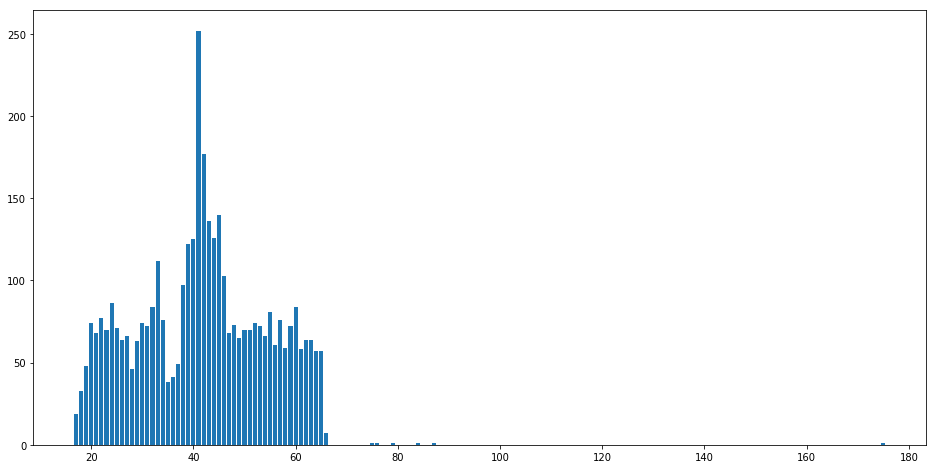

In [113]:
plt.figure(figsize=(16,8))
plt.bar(dob_count.keys(), dob_count.values())
plt.show()

In [123]:
dob_count = {}

for dob in df_new.DOB:
    dob = str(dob).replace('/', '-')
    if dob == 'nan': continue
    dt = datetime.strptime(dob, '%Y-%m-%d')
    age = calculateAge(date(dt.year, dt.month, dt.day))
    
    if age not in dob_count.keys(): dob_count[age] = 1
    else: dob_count[age] += 1

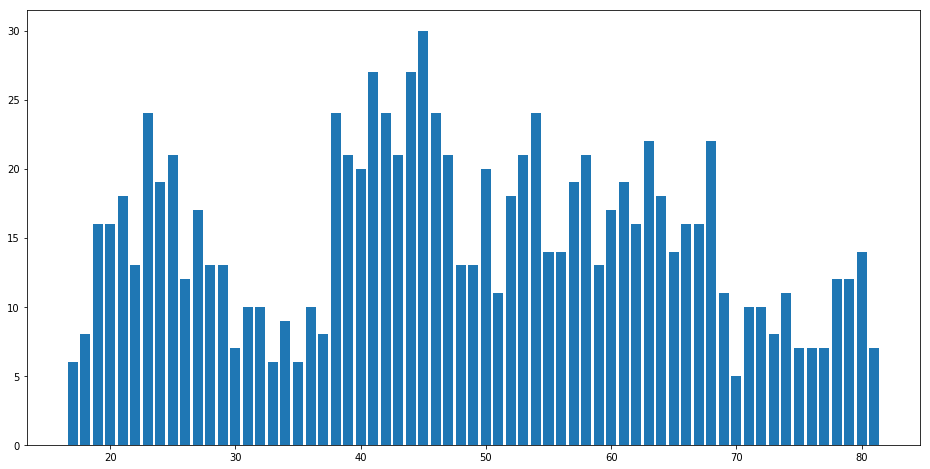

In [124]:
plt.figure(figsize=(16,8))
plt.bar(dob_count.keys(), dob_count.values())
plt.show()

In [143]:
unq_customer = df_demos.first_name.str.upper() + df_demos.DOB.str.replace('/', '-')

unq_customer

# np.unique(unq_customer, return_counts=True)

0             LARAINE1953-10-12
1                 ELI1980-12-16
2                ARLIN1954-1-20
3               TALBOT1961-10-3
4       SHEILA-KATHRYN1977-5-13
                 ...           
3995            ROSALIA1975-8-9
3996            BLANCH2001-7-13
3997                        NaN
3998        PATRIZIUS1973-10-24
3999             KIPPY1991-11-5
Length: 4000, dtype: object

In [157]:
df_customer_list.loc[df_customer_list.DOB.isna(), 'DOB'] = '' 
df_customer_list['uniqueness'] = df_customer_list.first_name.str.upper() + df_customer_list.DOB

for unq in df_customer_list['uniqueness']:
    if df_customer_list.loc[df_customer_list['uniqueness'] == unq, 'uniqueness'].count() > 1:
        print(df_customer_list.loc[df_customer_list['uniqueness'] == unq, 'uniqueness'])

In [170]:
k, c = np.unique(df_addr.address, return_counts=True)

k[np.where(c == 2)[0]]

array(['3 Mariners Cove Terrace', '3 Talisman Place',
       '64 Macpherson Junction'], dtype=object)

In [172]:
k, c = np.unique(df_trans.transaction_id, return_counts=True)

k[np.where(c >= 2)[0]]

array([], dtype=int64)

In [161]:
df_customer_details = pd.merge(df_customer_list, df_trans, on='customer_id', how='left')